Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 1

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [X] Choose your target. Which column in your tabular dataset will you predict?
- [X] Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.
- [X] Determine whether your problem is regression or classification.
- [X] Choose your evaluation metric.
- [X] Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.
- [X] Begin to clean and explore your data.
- [X] Begin to choose which features, if any, to exclude. Would some features "leak" information from the future?

## Reading

### ROC AUC
- [Machine Learning Meets Economics](http://blog.mldb.ai/blog/posts/2016/01/ml-meets-economics/)
- [ROC curves and Area Under the Curve explained](https://www.dataschool.io/roc-curves-and-auc-explained/)
- [The philosophical argument for using ROC curves](https://lukeoakdenrayner.wordpress.com/2018/01/07/the-philosophical-argument-for-using-roc-curves/)

### Imbalanced Classes
- [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn)
- [Learning from Imbalanced Classes](https://www.svds.com/tbt-learning-imbalanced-classes/)

### Last lesson
- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [How Shopify Capital Uses Quantile Regression To Help Merchants Succeed](https://engineering.shopify.com/blogs/engineering/how-shopify-uses-machine-learning-to-help-our-merchants-grow-their-business)
- [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), by Lambda DS3 student Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by Kevin Markham, with video
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)

In [43]:
import pandas as pd

import numpy as np

from scipy.stats import randint, uniform
import random as ran

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import f_classif, chi2, SelectKBest, SelectPercentile, SelectFpr, SelectFromModel
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

import category_encoders as ce

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='sklearn')

In [2]:
df = pd.read_csv("vgcSun_hot.csv")

In [ ]:
target = "winner"
features = df.columns.drop("winner")

I don't need to exclude anything. There isn't much there in the first place, just the teams and the winners.

It is a classification problem.

I'll try using R^2, accuracy, and ROC as metrics.

In [14]:
baseline_pred = ["team_2"] * len(df)

In [16]:
accuracy_score(baseline_pred, df["winner"])

0.5

I already did a LOT of feature exploration and engineering. For reference, the original first line looked like this;

Xerneas,Smeargle,Incineroar,Lunala,Ludicolo,Kartana,Lunala,Xerneas,Ludicolo,Incineroar,Stakataka,Smeargle,1

In [18]:
inputTrain, inputValidate, outputTrain, outputValidate = train_test_split(
    df[features], df['winner'], train_size=0.8, test_size=0.2)

In [20]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1)

model.fit(inputTrain, outputTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [21]:
model.score(inputValidate, outputValidate)

0.6198118428334256

In [44]:
scores = cross_val_score(model, df[features], df[target], cv=5, scoring='accuracy')
print(f'Accuracy for 5 folds:', scores)

Accuracy for 5 folds: [0.57466814 0.58075221 0.58305648 0.56866002 0.59856035]


In [45]:
scores.mean()

0.5811394417820637

In [51]:
y_pred_proba=model.predict_proba(inputValidate)[:,1]

In [63]:
roc_auc_score(outputValidate, y_pred_proba)

0.6613951266125179

Text(0, 0.5, 'True Positive Rate')

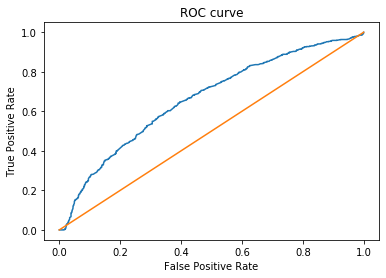

In [60]:
fpr, tpr, thresholds = roc_curve(outputValidate, y_pred_proba, pos_label="team_2")
plt.plot(fpr, tpr)
plt.plot([ x/10 for x in range(11) ], [ x/10 for x in range(11) ])
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')